In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import librosa, librosa.display
import IPython.display as ipd
from scipy.io import wavfile 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import drive
import pickle

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def load_pkl_data():
  X_train = pickle.load(open('drive/My Drive/Audio analytics/pickle/X_train.pkl', 'rb'))
  y_train = pickle.load(open('drive/My Drive/Audio analytics/pickle/y_train.pkl', 'rb'))
  X_test = pickle.load(open('drive/My Drive/Audio analytics/pickle/X_test.pkl', 'rb'))
  y_test = pickle.load(open('drive/My Drive/Audio analytics/pickle/y_test.pkl', 'rb'))

  return X_train, y_train, X_test, y_test

In [0]:
# Приведение к одномерному массиву
def changing_dim(X):

  for i in range(len(X)):
    X[i] = np.ravel(X[i])

  # Приведение массивов к одной длине (заполение нулями)
  max_len = max([len(i) for i in X])
  for i in range(len(X)):
    X[i] = np.resize(X[i], max_len)

  return X

In [0]:
X_train, y_train, X_test, y_test = load_pkl_data()
class_names = list(set(y_test))

In [0]:
X_train = changing_dim(X_train)
X_test = changing_dim(X_test)

In [52]:
# Классификация с помощью Логистической регрессии
log_reg = LogisticRegression(solver='saga')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [55]:
# Оценки для каждого класса
print(classification_report(y_test, y_pred, target_names=class_names))

                       precision    recall  f1-score   support

                 Meow       0.23      0.26      0.25        38
      Finger_snapping       0.17      0.24      0.20        37
               Squeak       0.11      0.07      0.08        30
             Clarinet       0.17      0.19      0.18        37
               Hi-hat       0.12      0.09      0.10        23
            Harmonica       0.00      0.00      0.00        13
   Gunshot_or_gunfire       0.09      0.11      0.10        38
              Shatter       0.00      0.00      0.00        16
             Applause       0.22      0.22      0.22        36
                 Fart       0.00      0.00      0.00        14
       Microwave_oven       0.17      0.09      0.12        33
            Fireworks       0.58      0.62      0.60        24
         Glockenspiel       0.13      0.18      0.15        39
                Cello       0.00      0.00      0.00        19
                  Bus       0.25      0.35      0.29  

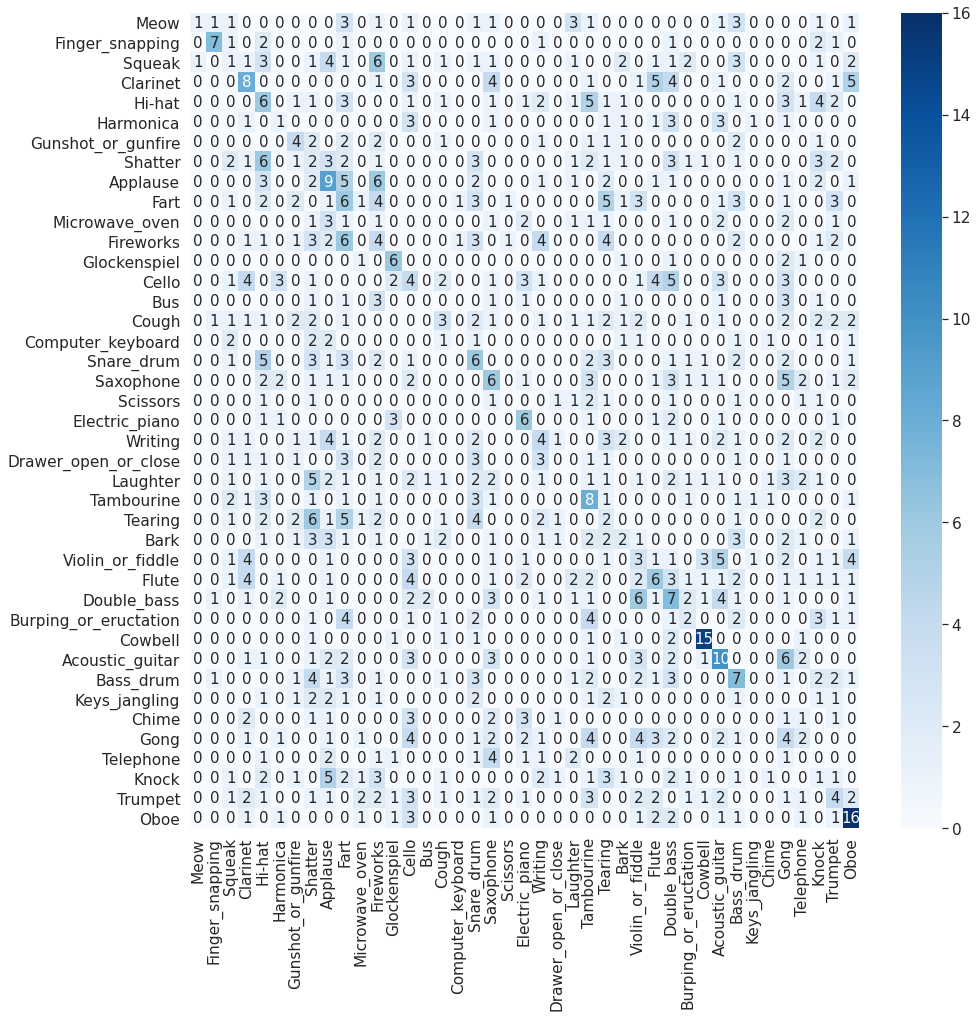

In [56]:
# Построение Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(15,15))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, cmap='Blues')